In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense




/opt/anaconda3/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:
# Data generators
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "/Users/mubhinbasnet/Downloads/fruits-360/Test",
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    "/Users/mubhinbasnet/Downloads/fruits-360/Training",
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical'
)



Found 43442 images belonging to 250 classes.
Found 130344 images belonging to 250 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 250)            │        32,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385,338 (16.73 MB)

 Trainable params: 4,385,338 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 214s 157ms/step - accuracy: 0.7700 - loss: 1.0017 - val_accuracy: 0.8240 - val_loss: 0.8476
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 229s 168ms/step - accuracy: 0.9688 - loss: 0.1048 - val_accuracy: 0.8593 - val_loss: 0.7914
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 234s 172ms/step - accuracy: 0.9776 - loss: 0.0722 - val_accuracy: 0.8713 - val_loss: 0.7624
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 233s 172ms/step - accuracy: 0.9820 - loss: 0.0595 - val_accuracy: 0.8640 - val_loss: 0.8789
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 229s 168ms/step - accuracy: 0.9837 - loss: 0.0531 - val_accuracy: 0.8644 - val_loss: 0.9328
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 229s 168ms/step - accuracy: 0.9887 - loss: 0.0364 - val_accuracy: 0.8706 - val_loss: 0.8992
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 239s 176ms/step - accuracy: 0.9897 - loss: 0.0354 - val_accuracy: 0.8562 - val_loss: 0.9618
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 243s 179ms/step - ac

In [17]:

class_labels = list(train_data.class_indices.keys())



In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Make sure this exists from your training generator
class_labels = list(train_data.class_indices.keys())

def predict_fruit(img_path, model, labels=class_labels, show_image=True):
    """
    Predict the fruit in an image using a trained model.

    Parameters:
        img_path (str): Path to the image
        model: Trained Keras model
        labels (list): Class labels
        show_image (bool): Whether to display the image

    Returns:
        str: Predicted fruit name
    """
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]
    fruit_name = labels[pred_class]

    # Display image with prediction
    if show_image:
        plt.imshow(img)
        plt.title(f"Predicted: {fruit_name}")
        plt.axis('off')
        plt.show()

    return fruit_name


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


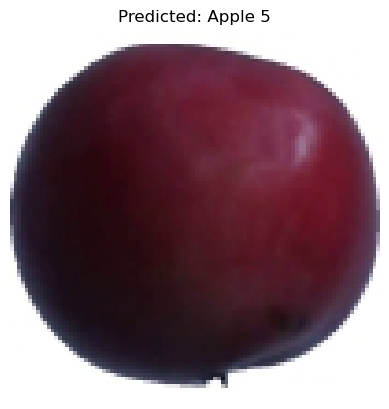

Predicted Fruit: Apple 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


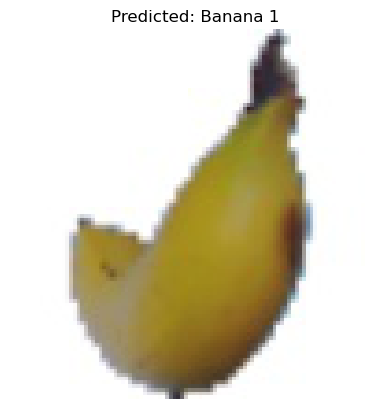

'Banana 1'

In [16]:
# Predict a single fruit
predicted = predict_fruit('Test/Apple 5/r0_3_100.jpg', model)
print("Predicted Fruit:", predicted)

# Predict another image
predict_fruit('/Users/mubhinbasnet/Downloads/fruits-360/Test/Banana 1/12_100.jpg', model)
